<h1 style='font-size: 35px; color: crimson; font-family: Colonna MT; text-align: center; font-weight: 600'>Exploratory Data Analysis (EDA) on the Iris Dataset</h1>

---

<h3 style='font-size: 18px; color: crimson; font-family: Colonna MT; font-weight: 600'>1.1: Overview</h3>
 

This analysis focuses on performing *Exploratory Data Analysis (EDA)* on the **Iris Dataset**, a well-known dataset in machine learning and statistics. The goal is to understand the dataset’s structure, identify patterns, detect outliers, and explore feature relationships. The insights from this analysis can be used for further research, classification modeling, and improving data-driven decision-making.


<h3 style='font-size: 18px; color: crimson; font-family: Colonna MT; font-weight: 600'>1.2: Goals of the Analysis</h3>
 

***Through this EDA, we aim to:***

- ✅ Understand the **basic structure** of the Iris dataset.  
- ✅ Identify **key features** that differentiate species.  
- ✅ Provide **visualizations** to summarize data insights.  
- ✅ Compute summary statistics, specifically, **Mean**(Average value of each numerical parameter within groups).

<h1 style='font-size: 20px; color: crimson; font-family: Colonna MT; font-weight: 600'>2.0: Import Required Libraries</h1>

In [2]:
# Statistical analysis libraries
from statsmodels.stats.multicomp import pairwise_tukeyhsd  
from statsmodels.formula.api import ols as smf_ols 
from statsmodels.stats.anova import anova_lm  
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf 
import statsmodels.api as sm  

# Data transformation and analysis
from scipy.stats import shapiro, levene, skew, kurtosis 
from sklearn.preprocessing import PowerTransformer 
import scipy.stats as stats  

# Data manipulation and visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np 
import string
import math  
import re 

# Miscellaneous
import warnings  
warnings.simplefilter("ignore")  
pd.set_option('display.max_columns', 8) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Control floating-point display format

print("Libraries Loaded Successfully")

Libraries Loaded Successfully


<h1 style='font-size: 20px; color: crimson; font-family: Colonna MT; font-weight: 600'>3.0: Import and Preprocessing Dataset</h1>

In [3]:
def Loading_iris_data():
    from sklearn.datasets import load_iris
    iris = load_iris()  # Load the Iris dataset
    X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
    y = iris.target  # Labels (species of iris)
    
    # Feature names and Target names
    feature_names = iris.feature_names
    target_names = iris.target_names

    df = pd.DataFrame(X, columns=feature_names)
    df['Species'] = y
    df['Species'] = df['Species'].map({i: name for i, name in enumerate(target_names)})
    return df

df = Loading_iris_data()
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
5,5.40,3.90,1.70,0.40,setosa
6,4.60,3.40,1.40,0.30,setosa
7,5.00,3.40,1.50,0.20,setosa
8,4.40,2.90,1.40,0.20,setosa
9,4.90,3.10,1.50,0.10,setosa


<h1 style='font-size: 25px; color: crimson; font-family: Colonna MT; font-weight: 600'>4.0: Dataset Informations/ Overview</h1>

In [4]:
df.shape

(150, 5)

In [112]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- sepal length (cm)
--------------- sepal width (cm)
--------------- petal length (cm)
--------------- petal width (cm)
--------------- Species


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h4 style='font-size: 20px; color: blue; font-family: Colonna MT; font-weight: 600'>4.2: Columns Summary</h4>

In [8]:
def column_summary(df):
    summary_data = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,sepal length (cm),float64,0,150,35,"{5.0: 10, 5.1: 9, 6.3: 9, 5.7: 8, 6.7: 8, 5.8:..."
1,sepal width (cm),float64,0,150,23,"{3.0: 26, 2.8: 14, 3.2: 13, 3.4: 12, 3.1: 11, ..."
2,petal length (cm),float64,0,150,43,"{1.4: 13, 1.5: 13, 5.1: 8, 4.5: 8, 1.6: 7, 1.3..."
3,petal width (cm),float64,0,150,22,"{0.2: 29, 1.3: 13, 1.8: 12, 1.5: 12, 1.4: 8, 2..."
4,Species,object,0,150,3,"{'setosa': 50, 'versicolor': 50, 'virginica': 50}"


<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>4.3: Handling Duplicates Values</h4>

In [113]:
def HandlingDuplicates(df):
    Duplicates = df.duplicated().sum()
    if Duplicates != 0:
        df.drop_duplicates(inplace=True)
        return print(f'Dataset has {Duplicates} Duplicates and values was cleaned successifully....')
    else:
        print('Dataset has no Duplictes values')
HandlingDuplicates(df)

Dataset has no Duplictes values


<h4 style='font-size: 18px; color: Blue; font-family: Colonna MT; font-weight: 600'>4.4: Checking Missing Values</h4>

Checking for missing values is a crucial step in data analysis to assess the completeness and reliability of the dataset. This involves identifying any columns with null or empty entries, which may affect the accuracy of statistical and machine learning models.

In [11]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,sepal length (cm),0,0.00
1,sepal width (cm),0,0.00
2,petal length (cm),0,0.00
3,petal width (cm),0,0.00
4,Species,0,0.00


<h4 style='font-size:18px; color: Blue; font-family: Colonna MT; font-weight: 600'>4.5: Renaming Columns</h4>

When working with data, especially in statistical tests like ANOVA, column names with special characters or spaces can cause errors. To avoid this, we can clean the column names by converting them to lowercase, replacing any special characters (such as punctuation) with underscores, and ensuring there are no spaces. This makes the column names consistent and compatible with most analysis functions, preventing errors during data processing. The renaming process is automatic, making it easy to handle datasets with potentially problematic column names.

In [94]:
def rename(text):
    #text = text.lower()
    #text = re.sub(r'[^a-zA-Z]', "",  text) 
    text = re.sub(r'[^\w\s]', '_', text)
    text = re.sub(r' ', '_', text)
    return text

data = df.copy()
data.columns = df.columns.to_series().apply(rename)

print(f"\nOriginal columns name:")
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

print(f"\nRenamed columns name:")
for column in data.columns.tolist(): print(f"{'-'*15} {column}")


Original columns name:
--------------- sepal length (cm)
--------------- sepal width (cm)
--------------- petal length (cm)
--------------- petal width (cm)
--------------- Species

Renamed columns name:
--------------- sepal_length__cm_
--------------- sepal_width__cm_
--------------- petal_length__cm_
--------------- petal_width__cm_
--------------- Species


<h4 style='font-size: 18px; color: blue;  font-family: Colonna MT; font-weight: 600'>4.6: Exploring Invalid Entries Dtypes</h4>

Exploring invalid entries in data types involves identifying values that do not match the expected format or category within each column. This includes detecting inconsistencies such as numerical values in categorical fields, incorrect data formats, or unexpected symbols and typos. Invalid entries can lead to errors in analysis and model performance, making it essential to standardize data types and correct anomalies.

In [111]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'  # Add % sign and format to 2 decimal places
            else:
                results.at[column, dtype] = '-'  # Add dash for 0%
    return results

results = analyze_column_dtypes(df)
display(results)


,Numeric,Datetime,Missing,String,Other
sepal length (cm),100.00%,-,-,-,-
sepal width (cm),100.00%,-,-,-,-
petal length (cm),100.00%,-,-,-,-
petal width (cm),100.00%,-,-,-,-
Species,-,-,-,-,100.00%


<h1 style='font-size: 25px; font-family: Colonna MT; font-weight: 600'>5.0: Detection and Handling Outliers</h1>

An outlier is a data point that significantly deviates from the rest of the dataset, appearing as an unusually high or low value. Outliers may arise from errors, data entry mistakes, or natural variations, and can distort statistical analysis and machine learning models. To maintain data integrity, outliers should be detected using methods like Z-scores, IQR, or visual tools (e.g., box plots), and then handled appropriately.

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.1: Visualize Outliers Using Boxplots</h4>

Boxplots are a great way to visualize the distribution of data and identify outliers. Outliers are typically represented as individual points outside the "whiskers" of the boxplot.

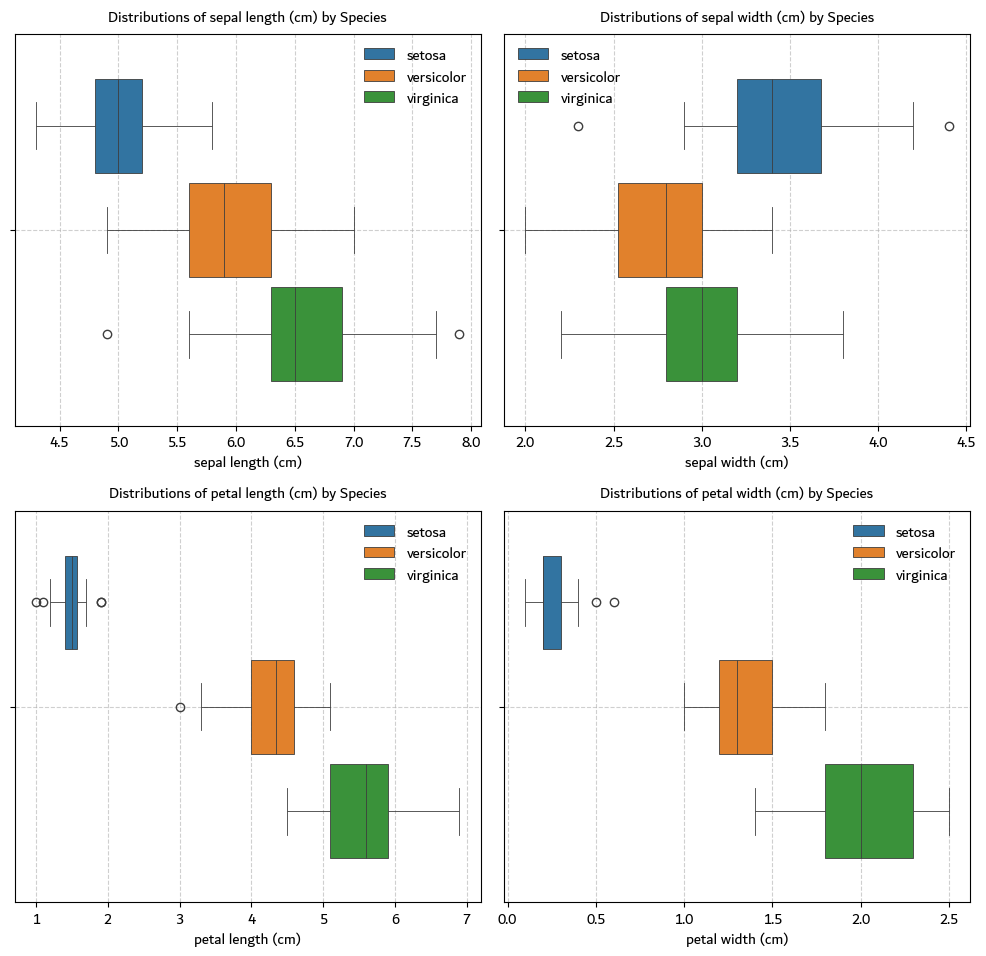

In [33]:
def Boxplot(df, Variables, group):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.boxplot(data=df, x=df[column], fill=True, gap=0.1, ax=axes[idx], hue=group, linewidth=0.6)   
        axes[idx].set_title(f"Distributions of {column} by {group}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
        axes[idx].legend(frameon=False)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Boxplot(df, Variables=Variables, group='Species')

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.2: Outliers Proportions in Dataset Using(IQR)</h4>

In [34]:
def Outlier_detection_IQR(df: pd.DataFrame, group_col: str) -> pd.DataFrame:
    Variables = df.select_dtypes(include=['number']).columns.tolist()
    if group_col in Variables:
        Variables.remove(group_col)
    
    results = []
    for group, group_df in df.groupby(group_col):
        group_size = len(group_df)
        outlier_counts = {}
        for col in Variables:
            Q1 = group_df[col].quantile(0.25)
            Q3 = group_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outlier_count = ((group_df[col] < lower_bound) | (group_df[col] > upper_bound)).sum()
            outlier_counts[col] = outlier_count
        
        results.append({"Group": group, **outlier_counts, "Total Observations": group_size})
    outlier_df = pd.DataFrame(results)
    return outlier_df

Outliers = Outlier_detection_IQR(df, group_col='Species')
Outliers.T

,0,1,2
Group,setosa,versicolor,virginica
sepal length (cm),0,0,2
sepal width (cm),2,0,0
petal length (cm),4,1,0
petal width (cm),2,0,0
Total Observations,50,50,49


<h3 style='font-size: 18px; color: blue; font-family: colonna mt; font-weight: 600'>5.3: Handling Outliers (Treating outliers)</h3>

In this analysis, we simply leavea outliers because it doesn't lead any problem 

<h1 style='font-size: 25px; font-family: Colonna MT; font-weight: 600'>6.0: Statistic Description of The Datasets</h1>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a bird's-eye view of the data, helping us understand the general distribution and characteristics of the values.

In [37]:
summary_stats = df.describe()
summary_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.00,149.00,149.00,149.00
mean,5.84,3.06,3.75,1.19
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.30,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


<h4 style='font-size: 18px; color: blue; font-family: colonna mt; font-weight: 600'>6.1:  Distribution of Continuous variables</h4>

Let’s explore the distribution of continuous variables in our dataset by examining key statistics. The **Mean** gives us the average value, while the **Median** provides the middle value, offering a more robust measure against outliers. The **Mode** identifies the most frequent value. **Standard Deviation** and **Variance** show how much the data deviates from the mean, with larger values indicating greater spread. The **Range** reveals the difference between the maximum and minimum values, while **Skewness** measures the symmetry of the distribution. Lastly, **Kurtosis** tells us about the presence of outliers by analyzing the "tailedness" of the distribution. Together, these metrics give us a comprehensive view of how the data is distributed and guide us in identifying any potential issues like skewness or outliers.

In [40]:
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis


        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

pd.set_option('display.max_columns', 10) 
Continuous_variables_distribution = compute_overall_distribution_stats(df)
Continuous_variables_distribution

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,sepal length (cm),5.84,5.80,5.00,0.83,0.69,3.60,0.31,-0.59
1,sepal width (cm),3.06,3.00,3.00,0.44,0.19,2.40,0.30,0.18
2,petal length (cm),3.75,4.30,1.40,1.77,3.13,5.90,-0.26,-1.40
3,petal width (cm),1.19,1.30,0.20,0.76,0.58,2.40,-0.09,-1.34


<h4 style='font-size: 18px; color: blue; font-family: colonna mt; font-weight: 600'>6.2:  Group-wise Distribution of Continuous variables</h4>

The function below computes these statistics for each numerical column in the dataset, grouped by the values in the specified `group_column`. The result is returned in a DataFrame where each row corresponds to a group and contains the calculated statistics for each numerical column. This function is useful for analyzing how the distribution of data varies across different groups within a dataset.

In [45]:
def compute_group_distribution_stats(df, group_column):
    results = []
    grouped = df.groupby(group_column)
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != group_column:
            for group_name, group_data in grouped:
                mean = group_data[col].mean()
                median = group_data[col].median()
                mode = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                std_dev = group_data[col].std()
                variance = group_data[col].var()
                cv = group_data[col].std() / group_data[col].mean() * 100  # Coefficient of Variation
                value_range = group_data[col].max() - group_data[col].min()
                
        
                skewness_val = skew(group_data[col], nan_policy='omit')  # Skewness
                kurtosis_val = kurtosis(group_data[col], nan_policy='omit')  # Kurtosis
                
                
                n = len(group_data[col])  # Sample size
                sem = std_dev / np.sqrt(n) if n > 1 else np.nan  # Standard error of the mean

                # Append the results to the list
                results.append({
                    group_column: group_name,
                    'Variables': col,
                    'Mean': mean,
                    'SEM': sem,
                    'Median': median,
                    'Mode': mode,
                    'Standard Deviation': std_dev,
                    'Variance': variance,
                    'Coefficient of Variation': cv,
                    'Range': value_range,
                    'Skewness': skewness_val,
                    'Kurtosis': kurtosis_val,
                })

    result_df = pd.DataFrame(results)
    return result_df

group_column = 'Species'
pd.set_option('display.max_columns', 12) 
RESULTS = compute_group_distribution_stats(df, group_column)
display(RESULTS)

,Species,Variables,Mean,SEM,Median,Mode,Standard Deviation,Variance,Coefficient of Variation,Range,Skewness,Kurtosis
0,setosa,sepal length (cm),5.01,0.05,5.00,5.00,0.35,0.12,7.04,1.50,0.12,-0.35
1,versicolor,sepal length (cm),5.94,0.07,5.90,5.50,0.52,0.27,8.70,2.10,0.10,-0.60
2,virginica,sepal length (cm),6.60,0.09,6.50,6.30,0.63,0.40,9.57,3.00,0.08,-0.02
3,setosa,sepal width (cm),3.43,0.05,3.40,3.40,0.38,0.14,11.06,2.10,0.04,0.74
4,versicolor,sepal width (cm),2.77,0.04,2.80,3.00,0.31,0.10,11.33,1.40,-0.35,-0.45
5,virginica,sepal width (cm),2.98,0.05,3.00,3.00,0.32,0.10,10.85,1.60,0.32,0.52
6,setosa,petal length (cm),1.46,0.02,1.50,1.40,0.17,0.03,11.88,0.90,0.10,0.80
7,versicolor,petal length (cm),4.26,0.07,4.35,4.50,0.47,0.22,11.03,2.10,-0.59,-0.07
8,virginica,petal length (cm),5.56,0.08,5.60,5.10,0.55,0.31,9.96,2.40,0.50,-0.28
9,setosa,petal width (cm),0.25,0.01,0.20,0.20,0.11,0.01,42.84,0.50,1.22,1.43


<h4 style='font-size: 18px; color: Blue; font-family: colonna mt; font-weight: 600'>6.3: Species-wise Comparatives Analysis </h4>

Now, let’s turn our attention to comparing the means of variables across different specified groups. This approach helps us understand how each variable behaves within various categories or groups. For instance, we might explore how the average outcome of a variable changes across different specie. Such comparisons allow us to identify any significant differences between groups, uncovering patterns or trends that could be crucial for deeper analysis. By analyzing these mean comparisons, we gain valuable insights into the relationships between variables and groups.

In [48]:
def summary_stats(df, group=''):
    Metrics = df.select_dtypes(include=np.number).columns.tolist()
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df


Treatmentstats_df = summary_stats(df, group='Species')
Treatmentstats_df

,Species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.01 ± 0.05,3.43 ± 0.05,1.46 ± 0.02,0.25 ± 0.01
1,versicolor,5.94 ± 0.07,2.77 ± 0.04,4.26 ± 0.07,1.33 ± 0.03
2,virginica,6.60 ± 0.09,2.98 ± 0.05,5.56 ± 0.08,2.03 ± 0.04
3,Grand Mean,5.84,3.06,3.75,1.19
4,SEM,0.07,0.04,0.14,0.06
5,%CV,14.22,14.26,47.15,63.84


<h4 style='font-size: 18px; color: Blue; font-family: colonna mt; font-weight: 600'>6.4: Distributions of Categorical Variables</h4>

Now, let’s explore the counts and proportions of categorical variables, both individually and across different groups. Counts indicate how frequently each category appears, providing insight into the overall distribution. Proportions, on the other hand, show the relative frequency of each category compared to the total, helping to identify balance or imbalance. Examining these aspects across groups can reveal patterns and relationships that may be important for further analysis. This exploration is essential for understanding the structure and distribution of categorical variables.

In [51]:
def Distributions_of_Categorical_Variables(df, categories):
    data = []
    for category in categories:
        counts = df[category].value_counts()
        proportions = df[category].value_counts(normalize=True)
        for value, count in counts.items():
            proportion = proportions[value]
            data.append({
                'Category': category,
                'Sub-category': value,
                'Counts': count,
                'Proportion': f"{proportion:.2%}" 
            })
    
    result_df = pd.DataFrame(data)
    return result_df

categories = df.select_dtypes(include=['object']).columns
Distributions_of_Categorical_Variables = Distributions_of_Categorical_Variables(df, categories)
Distributions_of_Categorical_Variables

,Category,Sub-category,Counts,Proportion
0,Species,setosa,50,33.56%
1,Species,versicolor,50,33.56%
2,Species,virginica,49,32.89%


<h1 style='font-size: 20px; color: Green; font-family: Candara; font-weight: 600'>7.0: Exploration of Data Distribution (Visualizations)</h1>

To gain more intuitive insights, let's explore the data distribution through visualizations. Visual tools like histograms, box plots, and scatter plots help us easily identify patterns, trends, and outliers in the data. These visuals provide a clear representation of how data is spread across variables, allowing for quicker interpretation and a deeper understanding of the dataset’s structure and relationships.

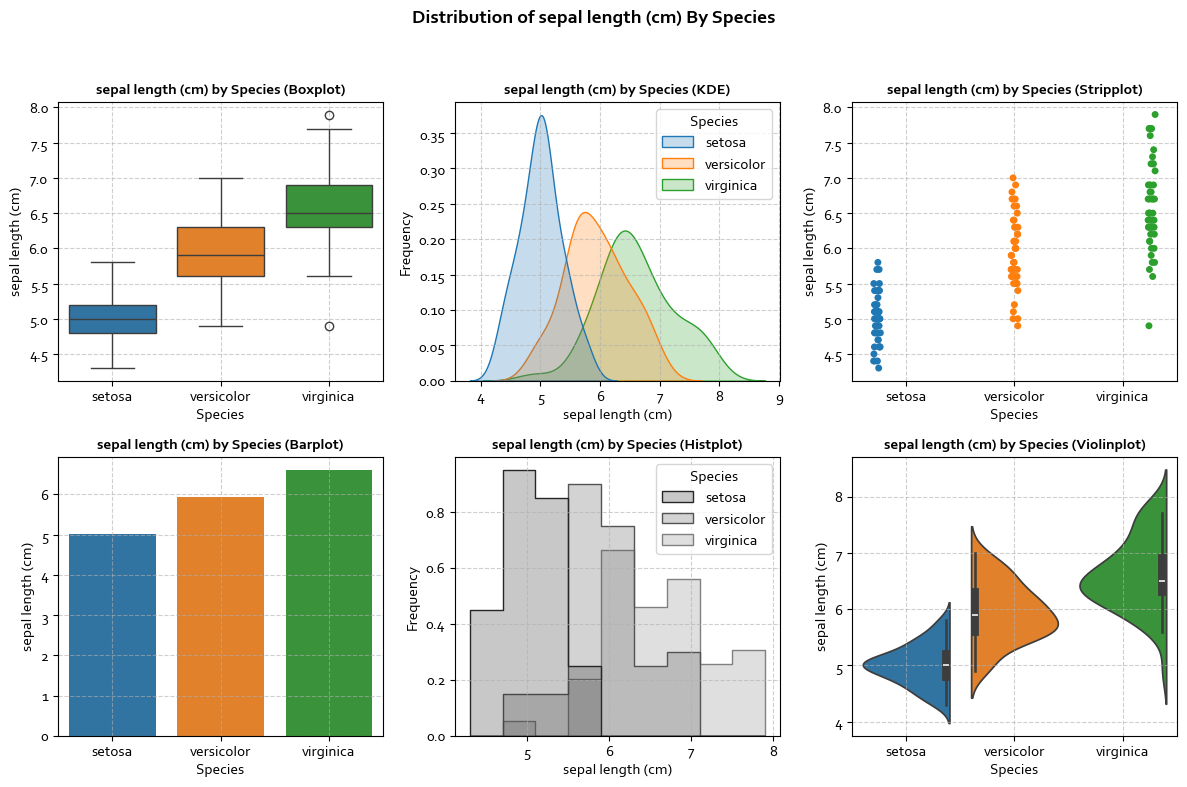

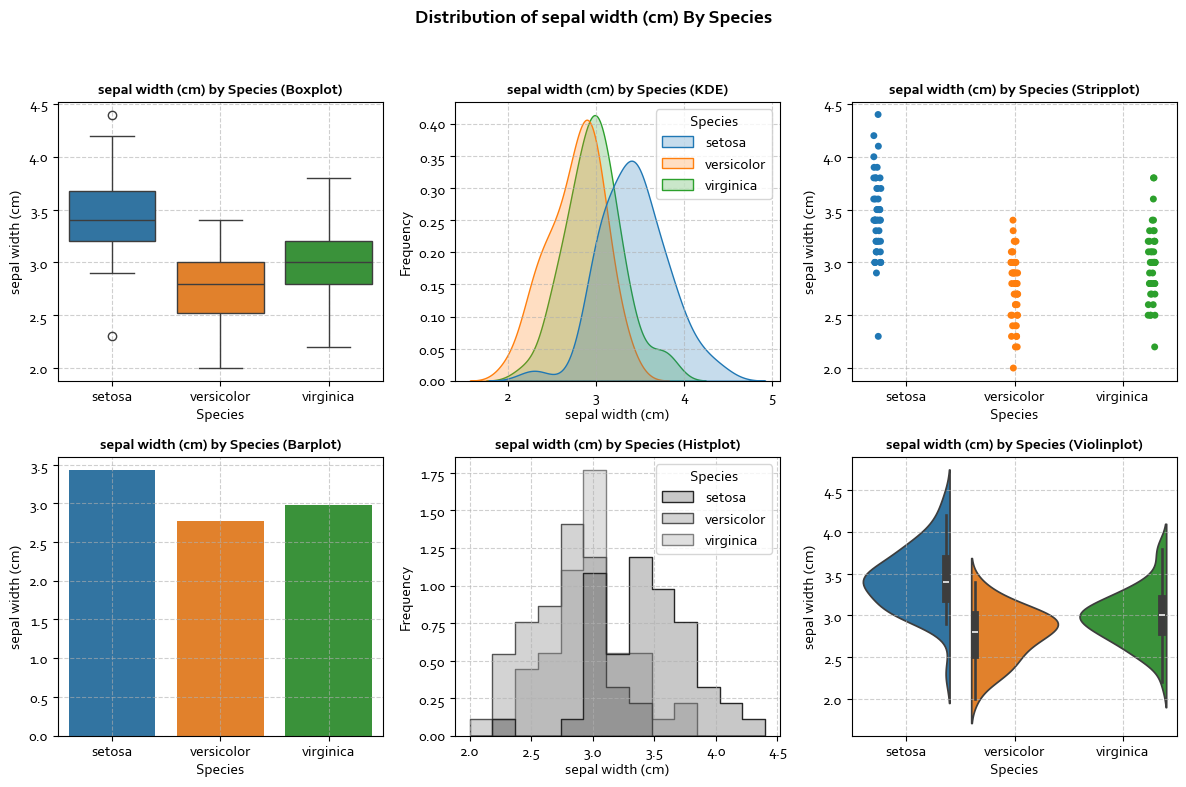

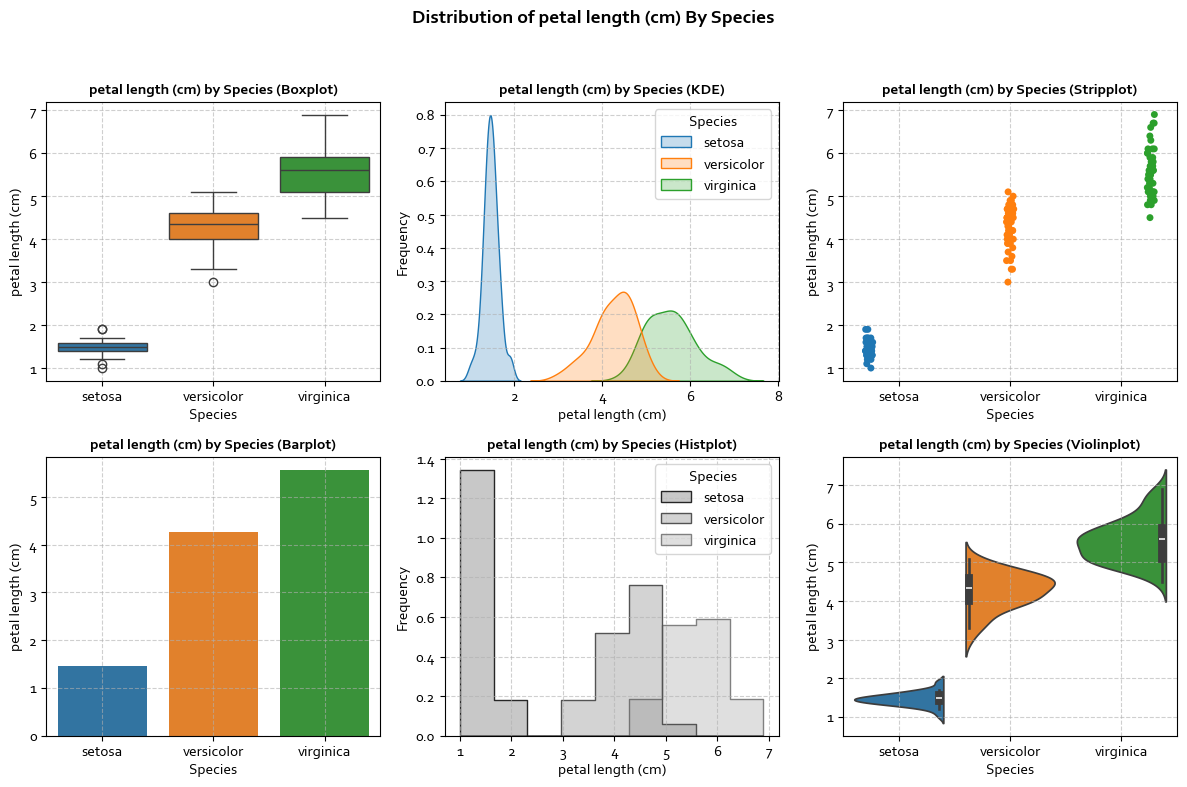

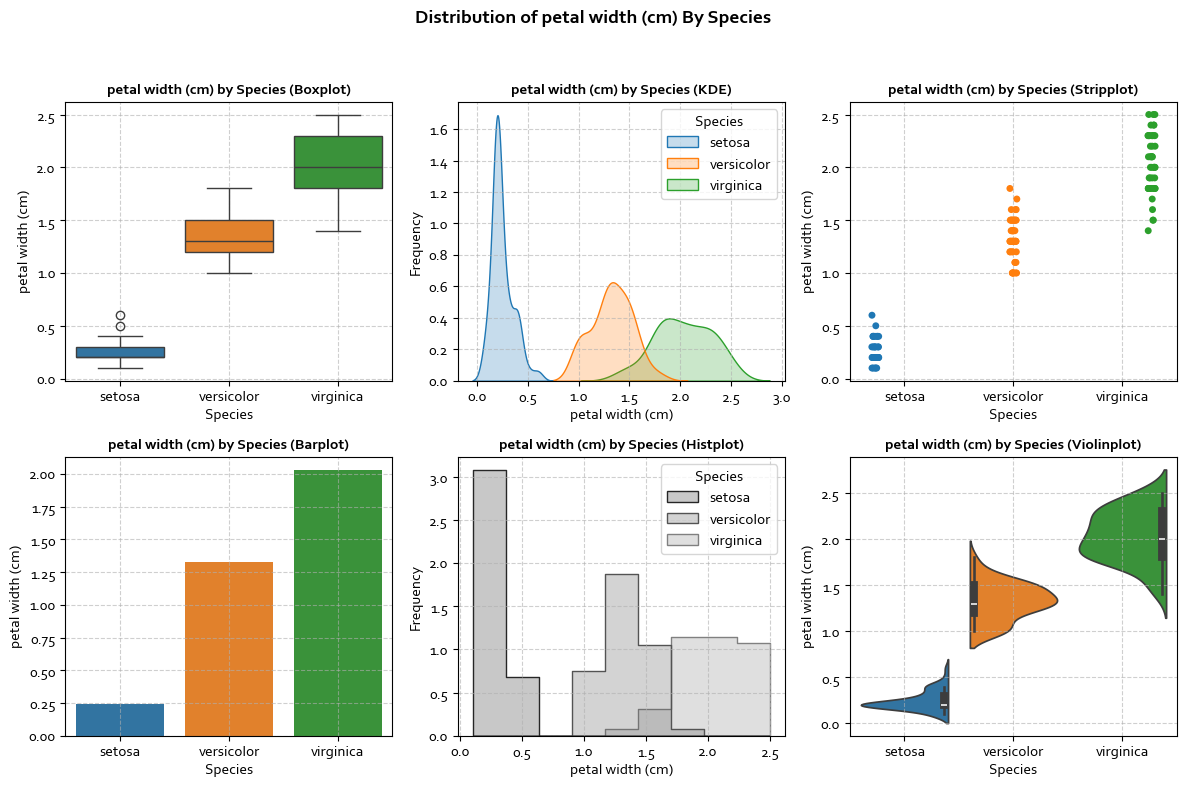

In [58]:
def create_distribution_plots(df, column, group = None, save_path=None):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    plt.rcParams.update({'font.family': 'Corbel', 'font.style': 'normal', 'font.size': 11})
    fig.suptitle(f'Distribution of {column} By {group}', fontsize=14, fontweight='bold')
    
    plot_types = [
        ('Boxplot', sns.boxplot, {'x': group, 'y': column, 'hue': group}),
        ('KDE', sns.kdeplot, {'x': column, 'hue': group, 'fill': True}),
        ('Stripplot', sns.stripplot, {'x': group, 'y': column, 'hue': group, 'dodge': True}),
        ('Barplot', sns.barplot, {'x': group, 'y': column, 'hue': group, 'errorbar': None}),
        ('Histplot', sns.histplot, {'x': column, 'hue': group, 'palette': 'dark:gray', 'element': 'step', 'stat': 'density', 'common_norm': False}),
        ('Violinplot', sns.violinplot, {'x': group, 'y': column, 'hue': group, 'split': True})
    ]
    

    for idx, (title, plot_func, plot_kwargs) in enumerate(plot_types):
        row, col = divmod(idx, 3)  # Adjusted to fit 2x3 layout
        plot_func(data=df, ax=axes[row, col], **plot_kwargs)
        axes[row, col].set_title(f"{column} by {group} ({title})", fontsize=11, fontweight='bold')
        axes[row, col].set_xlabel(column if 'x' in plot_kwargs and plot_kwargs['x'] == column else group)
        axes[row, col].set_ylabel('Frequency' if 'y' not in plot_kwargs else column)
        axes[row, col].grid(linestyle='--', alpha=0.6)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    if save_path: plt.savefig(save_path)
    plt.show()

Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
for column in Metrics:
    create_distribution_plots(df, column, group ='Species')

***To explore distributions of measurements we can use ``swarmplot`` to visualize datapoits***

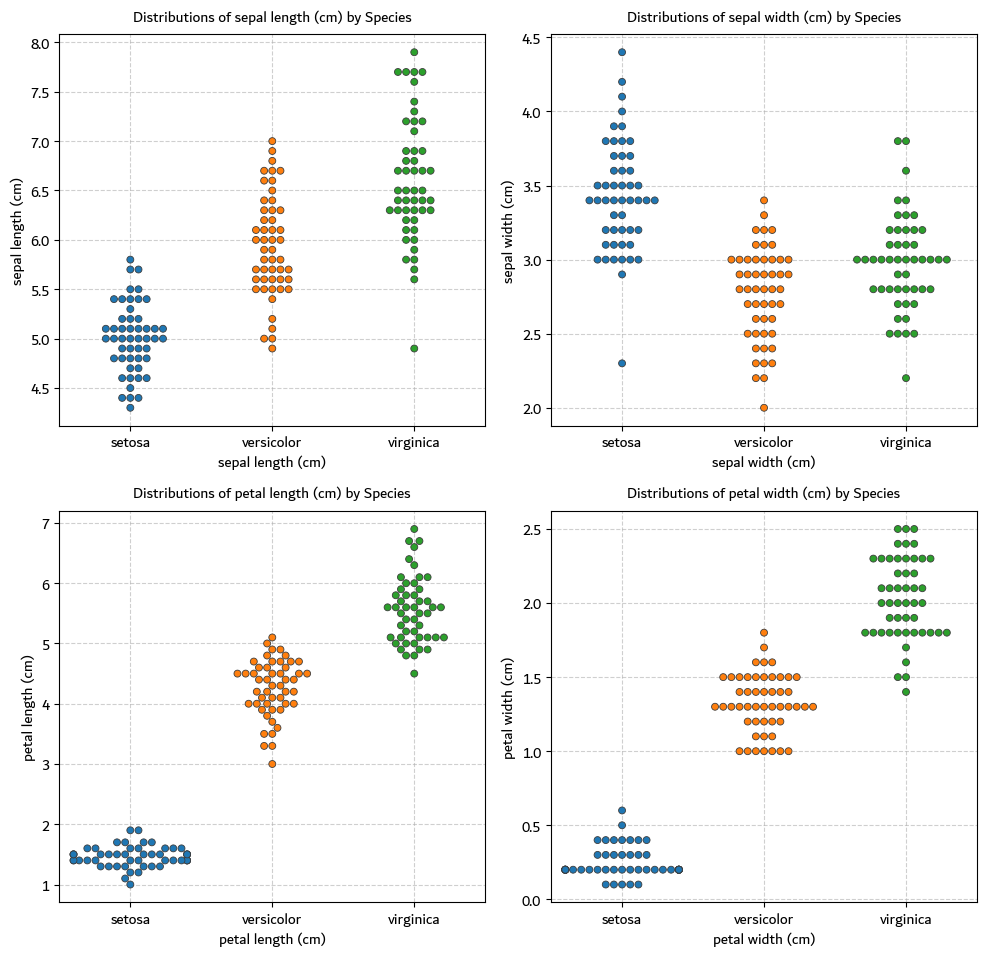

In [119]:
def swarmplot(df, Variables, group):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.swarmplot(data=df, x=df[group], y=df[column], ax=axes[idx], hue=group, linewidth=0.6)   
        axes[idx].set_title(f"Distributions of {column} by {group}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
swarmplot(df, Variables=Variables, group='Species')

<h1 style='font-size: 25px; color: Green; font-family: Colonna MT; font-weight: 600'>8.0: Correllation Analysis</h1>

<h3 style='font-size: 18px; color: Blue; font-family: Colonna MT; font-weight: 600'>8.1: Correlation Coefficients </h3>

In [60]:
def compute_correlation_matrix(df, method="pearson", visualize=True):
    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Invalid method. Choose from 'pearson', 'spearman', or 'kendall'.")
    
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr(method=method)
    
    return corr_matrix


correlation_matrix = compute_correlation_matrix(df, method="pearson")
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.36
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.36,0.96,1.00


<h3 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>8.2: Correlation Coefficients Heatmap </h3>

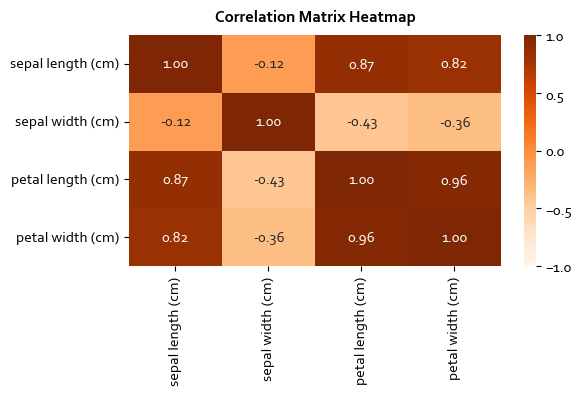

In [61]:
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=12, fontweight='bold', pad=10)
plt.grid(False)
plt.show()

<h3 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>8.3: Pearson’s</h3>

**Pearson’s r**: This measures the strength and direction of the linear relationship between two continuous variables. Values range from -1 to 1, with 0 indicating no relationship, 1 indicating a perfect positive relationship, and -1 indicating a perfect negative relationship.

In [64]:
from scipy.stats import pearsonr
def compute_pearson_r(df, numerical_columns):
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])
            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)',]
pearson_results_df = compute_pearson_r(df, numerical_columns=Metrics)
pearson_results_df.head(10)

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,sepal length (cm),sepal width (cm),-0.12,0.15,Negative,Weak
1,sepal length (cm),petal length (cm),0.87,0.00,Positive,Strong
2,sepal length (cm),petal width (cm),0.82,0.00,Positive,Strong
3,sepal width (cm),petal length (cm),-0.43,0.00,Negative,Moderate
4,sepal width (cm),petal width (cm),-0.36,0.00,Negative,Moderate
5,petal length (cm),petal width (cm),0.96,0.00,Positive,Strong


<h3 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>8.3: Relationship Between Variables (Scatterplot Matrix)</h3>

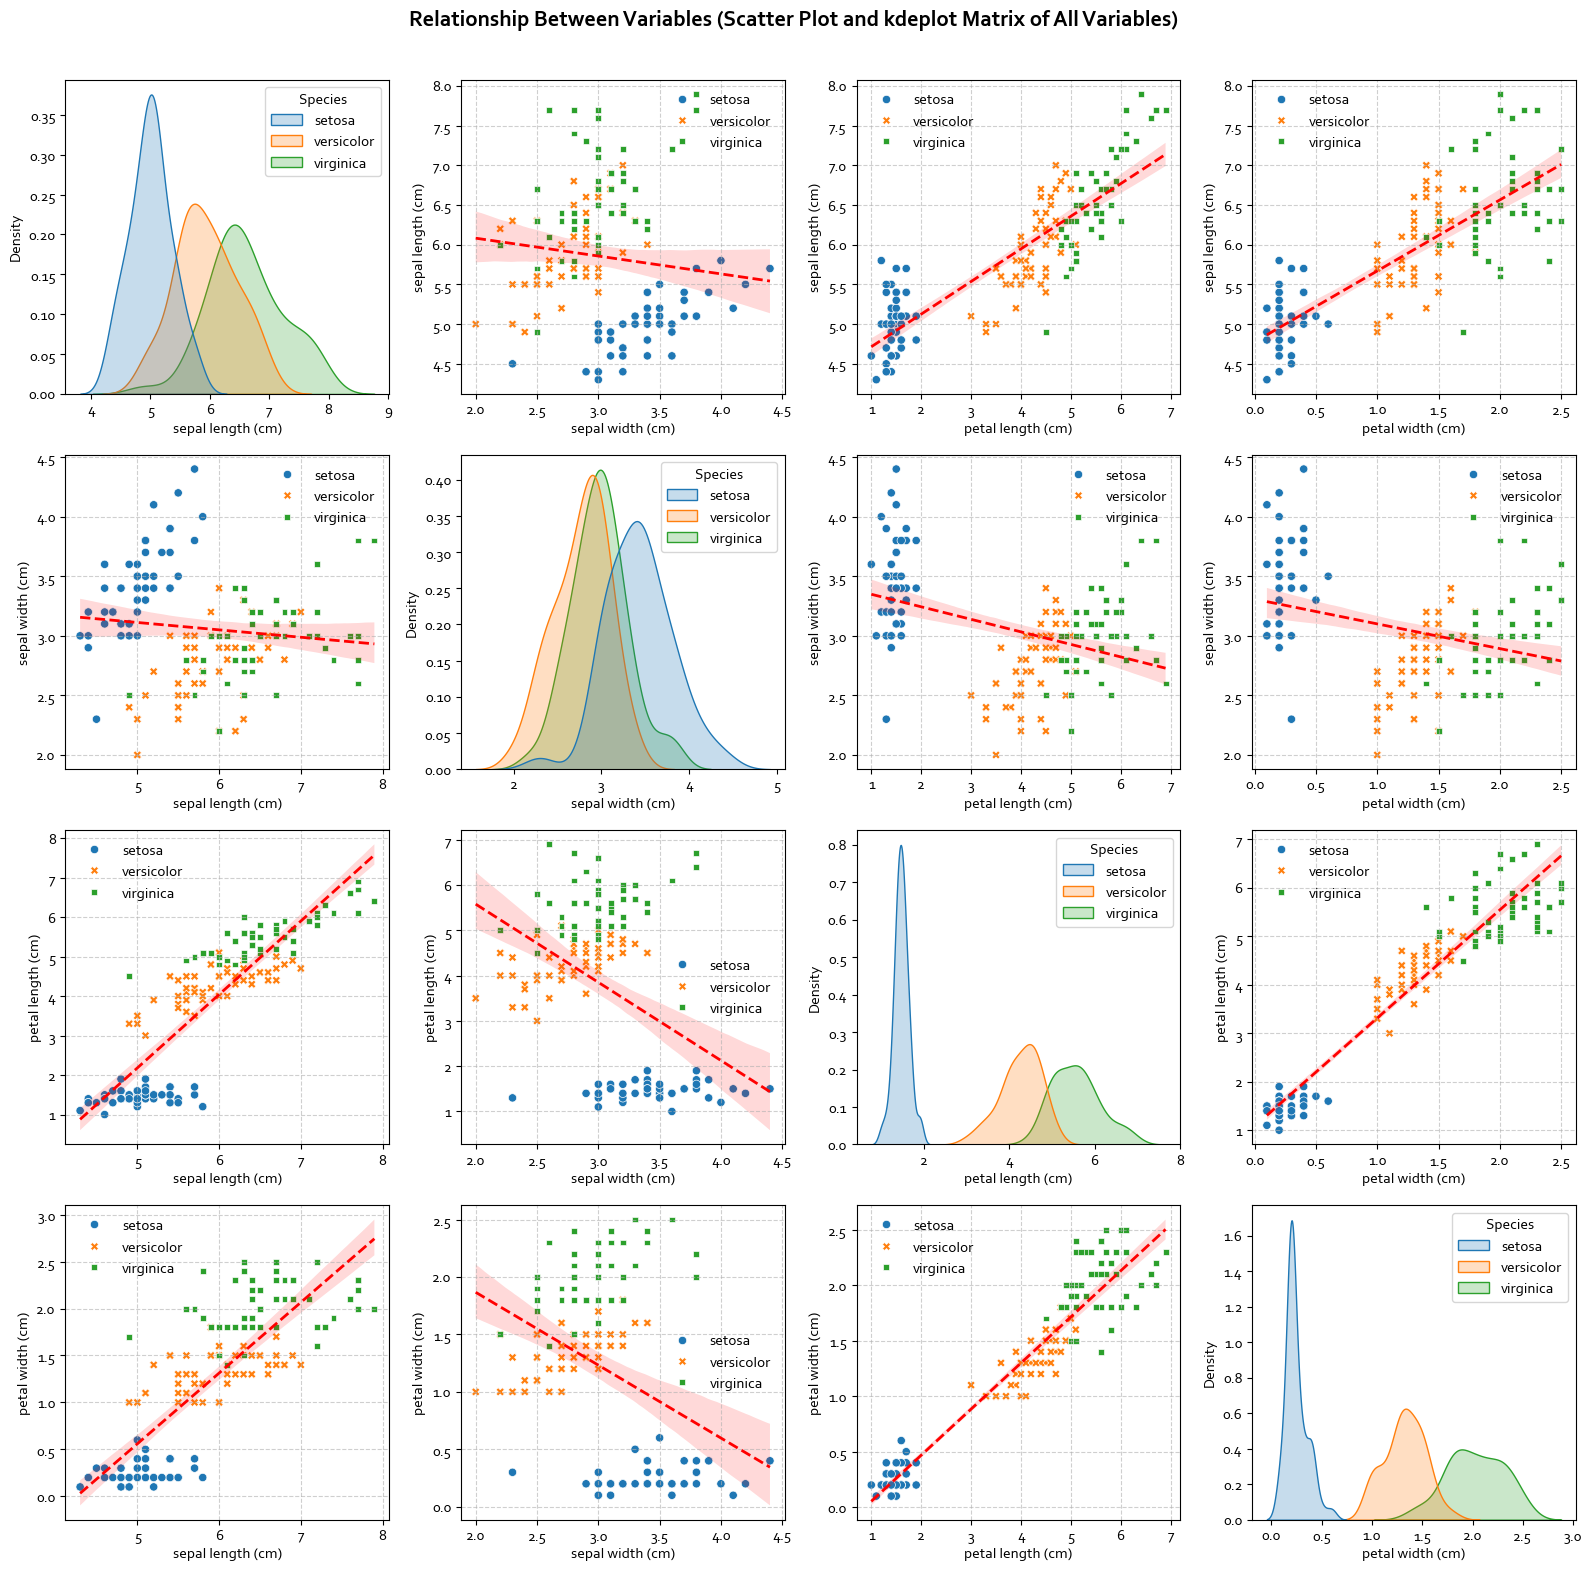

In [67]:
def scatterplot_matrix(data, Variables, group):
    num_variables = len(Variables)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    fig.suptitle('Relationship Between Variables (Scatter Plot and kdeplot Matrix of All Variables)', fontsize=16, fontweight='bold')
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                sns.kdeplot(data=df, x=df[Variables[j]], ax=ax, fill=True, hue=group)
                # Diagonal: Leave it empty or add variable name
                #ax.text(0.5, 0.5, Variables[i], fontsize=12, ha='center', va='center')
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel('Density', fontsize=11)
            else:
                sns.scatterplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax, hue=group, style=group, alpha=1)
                sns.regplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax,  scatter=False, line_kws={'color': 'red', 'linestyle': '--', 'lw': 2})
                
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel(Variables[i], fontsize=11)
                ax.grid(linestyle='--', alpha=0.6)
                ax.legend(frameon=False)
                
    
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('on') 
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scatterplot_matrix(data, Variables, group='Species')

<h1 style='font-size: 25px; color: crimson; font-family: Colonna MT; font-weight: 600'>9.0: Statistical Testing (Statistical Significance)</h1>

<h1 style='font-size: 20px; font-family: Colonna MT; font-weight: 600'>9.0: Parametictic Test Assumption Validation</h1>

<H4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>9.1: Homogeneity of Variance (Homoskedasticity)</H4>

Levene’s Test is a statistical method used to assess **homogeneity of variance (homoskedasticity)**, a key assumption in analyses like **ANOVA**. It tests whether the variances of different groups are equal, with a p-value greater than 0.05 indicating that the assumption holds. If violated, alternative approaches like **Welch's ANOVA** or data transformation may be necessary to ensure reliable results. This test helps maintain the integrity of statistical analysis by confirming whether ANOVA is appropriate for a given dataset.

In [93]:
def Levene_test(df, group_cols, numeric_cols=None): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        for g in group_cols:
            if g in numeric_cols:
                numeric_cols.remove(g)
    
    results = []
    for group_col in group_cols:
        for col in numeric_cols:
            grouped_data = [g[col].dropna().values for _, g in df.groupby(group_col)]
            if all(len(g) > 1 for g in grouped_data):  # Ensure each group has enough data
                levene_stat, levene_p = levene(*grouped_data)
                #interpretation = 'Homoscedasticity' if levene_p > 0.05 else 'Heteroscedasticity'
                interpretation = 'Homogeneous' if levene_p > 0.05 else 'Not Homogeneous'
                
            else:
                levene_stat, levene_p, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Group Column': group_col,
                'Variable': col,
                'Test Statistic': levene_stat,
                'P-Value': levene_p,
                'Interpretation': interpretation
            })
    
    return pd.DataFrame(results)

# Example usage
result_df = Levene_test(df, group_cols=['Species'])
display(result_df)

,Group Column,Variable,Test Statistic,P-Value,Interpretation
0,Species,sepal length (cm),6.081,0.003,Not Homogeneous
1,Species,sepal width (cm),0.608,0.546,Homogeneous
2,Species,petal length (cm),18.918,0.000,Not Homogeneous
3,Species,petal width (cm),20.321,0.000,Not Homogeneous


<h3 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>9.2: Normal Distribution (Normality Test)</h3>

- In statistical analysis, assessing whether data follows a normal distribution is a critical preliminary step, particularly before applying parametric tests such as ANOVA or t-tests. The assumption of normality underpins the reliability of these tests, as violations can lead to misleading results and incorrect conclusions. To evaluate this, normality tests are employed to determine if the distribution of a dataset aligns closely with a theoretical normal distribution. By verifying this assumption, analysts can decide whether the data is suitable for parametric testing or if alternative methods, such as data transformation or non-parametric tests, are more appropriate.

- In the context of our analysis, we utilize the **Shapiro-Wilk test** to examine normality, especially given its effectiveness with small to moderately sized samples. This test compares the order statistics of the observed data against a normal distribution and yields both a **W statistic** and a **p-value**. A **p-value greater than 0.05** indicates that we fail to reject the null hypothesis, suggesting the data is normally distributed. Conversely, a **p-value less than 0.05** implies that the data significantly deviates from normality.

- To strengthen this approach, we incorporate the Central Limit Theorem (CLT) through **bootstrapping**, where appropriate. By repeatedly sampling from the data and calculating the means of these samples, we approximate a sampling distribution of the mean. When bootstrapping is enabled, the Shapiro-Wilk test is applied to this distribution of sample means rather than the raw data. This helps determine whether the distribution of means — rather than individual observations — approximates normality, aligning with the assumptions of inferential statistics based on the CLT. If bootstrapping is disabled, the Shapiro-Wilk test is applied directly to the original dataset, offering a more traditional view of the data's normality. This dual approach provides flexibility and robustness in assessing the suitability of the data for further statistical analysis.


In [71]:
def bootstrapping(df, column, num_samples=1000, sample_size=30):
    sample_means = []
    for _ in range(num_samples):
        sample = df[column].dropna().sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())
    return sample_means

def shapiro_wilk_test(df, group_col, numeric_cols=None, use_bootstrap=True, num_samples=1000, sample_size=30): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        if group_col in numeric_cols:
            numeric_cols.remove(group_col)
    
    results = []
    for group, group_df in df.groupby(group_col):
        for col in numeric_cols:
            if use_bootstrap: data = bootstrapping(group_df, col, num_samples=num_samples, sample_size=sample_size)
            else:
                data = group_df[col].dropna()
                
            if len(data) >= 3:  # Shapiro requires at least 3 values
                stat, p_value = shapiro(data)
                interpretation = 'Normal' if p_value > 0.05 else 'Not Normal'
            else:
                stat, p_value, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Group': group,
                'Variable': col,
                'Test Statistic': stat,
                'P-Value': p_value,
                'Interpretation': interpretation,
                'Used Bootstrap': use_bootstrap
            })
        
    results_df = pd.DataFrame(results)
    return results_df

result_df = shapiro_wilk_test(df, group_col='Species', use_bootstrap=True)
display(result_df)

,Group,Variable,Test Statistic,P-Value,Interpretation,Used Bootstrap
0,setosa,sepal length (cm),1.00,0.63,Normal,True
1,setosa,sepal width (cm),1.00,0.60,Normal,True
2,setosa,petal length (cm),1.00,0.09,Normal,True
3,setosa,petal width (cm),0.99,0.00,Not Normal,True
4,versicolor,sepal length (cm),1.00,0.06,Normal,True
5,versicolor,sepal width (cm),1.00,0.24,Normal,True
6,versicolor,petal length (cm),1.00,0.01,Not Normal,True
7,versicolor,petal width (cm),1.00,0.25,Normal,True
8,virginica,sepal length (cm),1.00,0.70,Normal,True
9,virginica,sepal width (cm),1.00,0.64,Normal,True


<h3 style='font-family: Colonna MT; font-weight: 600; font-size: 18px; text-align: left'>9.3. Analysis of Varience (ANOVA)</h3>

Now, let's perform **Analysis of Variance (ANOVA)**, specifically the **One-Way ANOVA**, to assess whether there are statistically significant differences between the means of three or more independent groups. By analyzing the variance within and between groups, ANOVA helps us determine if the observed differences are due to a specific factor or just random variability. This is a crucial step in understanding how different treatments or conditions influence the outcome, providing a solid foundation for further post-hoc analysis like Tukey’s HSD to pinpoint where the differences lie.

In [76]:
def One_way_anova(data, Dependents_variables, Independents_variables):
    results = []
    Independents_variables = [rename(col) for col in Independents_variables]
    data = data.rename(columns={col: rename(col) for col in data.columns})
    for Independents_variable in Independents_variables:
        for col in Dependents_variables:
            column_name = rename(col)  
            formula = f"{column_name} ~ C({Independents_variable})" 
            model = smf.ols(formula, data=data).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            for source, row in anova_table.iterrows():
                p_value = row["PR(>F)"]
                interpretation = "Significant" if p_value < 0.05 else "No significant"
                if source == "Residual": interpretation = "-"
        
                results.append({
                    "Variable": col,
                    "Factor": Independents_variable.title(),
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Interpretation": interpretation
                })

    return pd.DataFrame(results)

Independents_variables = ["Species"]
Dependents_variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
Anova_results = One_way_anova(df, Dependents_variables, Independents_variables)
Anova_results

,Variable,Factor,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,sepal length (cm),Species,C(species),63.84,2.00,121.62,0.00,Significant
1,sepal length (cm),Species,Residual,38.32,146.00,NaN,NaN,-
2,sepal width (cm),Species,C(species),11.29,2.00,48.82,0.00,Significant
3,sepal width (cm),Species,Residual,16.89,146.00,NaN,NaN,-
4,petal length (cm),Species,C(species),435.50,2.00,1176.84,0.00,Significant
5,petal length (cm),Species,Residual,27.01,146.00,NaN,NaN,-
6,petal width (cm),Species,C(species),79.94,2.00,950.31,0.00,Significant
7,petal width (cm),Species,Residual,6.14,146.00,NaN,NaN,-


<h3 style='font-size: 18px; color: Blue; font-family: Colonna MT; font-weight: 600'>9.4: Welch's ANOVA (Welch's F test)</h3>

Welch's ANOVA (often called Welch's F test) is a statistical test used to compare the means of three or more groups when the assumption of equal variances (homoscedasticity) among the groups is violated. It is an adaptation of the traditional one-way ANOVA that is more robust in the presence of heteroscedasticity (unequal variances) and unequal sample sizes.

In [79]:
import pingouin as pg

def welchs_anova(data, Dependent_variables, Independent_variables):
    results = []
    
    Independent_variables = [rename(col) for col in Independent_variables]
    data = data.rename(columns={col: rename(col) for col in data.columns})
    for group in Independent_variables:
        for col in Dependent_variables:
            column_name = rename(col)
            
            # Perform Welch's ANOVA using pingouin
            aov = pg.welch_anova(data=data, dv=column_name, between=group)
            
            for _, row in aov.iterrows():
                p_value = row["p-unc"]
                interpretation = "Significant" if p_value < 0.05 else "Not Significant"
                results.append({
                    "Variable": col,
                    "Grouping Factor": group.title(),
                    "Source": row["Source"],
                    "df": row["ddof1"],  # Degrees of freedom between groups
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Significance": interpretation
                })

    return pd.DataFrame(results)

Independent_variables = ["Species"]
Dependent_variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
welch_results = welchs_anova(df, Dependent_variables, Independent_variables)
welch_results

,Variable,Grouping Factor,Source,df,F-Value,p-Value,Significance
0,sepal length (cm),Species,species,2,140.42,0.00,Significant
1,sepal width (cm),Species,species,2,44.90,0.00,Significant
2,petal length (cm),Species,species,2,1807.30,0.00,Significant
3,petal width (cm),Species,species,2,1256.45,0.00,Significant


<h3 style='font-size: 18px; color: Blue; font-family: Colonna MT; font-weight: 600'>9.5: Tukey's Honest Significant Difference (THSD)</h3>


Now, let's perform **Tukey’s Honest Significant Difference (THSD) test** to determine which groups are statistically similar or different. While **ANOVA** tells us if there is a significant difference among groups, it does not specify **which** groups differ. **Tukey’s HSD** helps by comparing all possible group pairs and assigning statistical significance to their differences. This step is crucial in identifying which groups share similarities and which ones are distinct, allowing for a more detailed interpretation of the results.

In [89]:
def Turkey_results(df, Dependent_variables, Independent_variable):
    results_data = []
    for metric in Dependent_variables:
        turkey_results = pairwise_tukeyhsd(endog=df[metric], groups=df[Independent_variable], alpha=0.05)
        results_table = turkey_results.summary()
        
        for i in range(1, len(results_table)):
            row = results_table.data[i]
            results_data.append({
                'Metric': metric,
                'Group1': row[0],
                'Group2': row[1],
                'Mean Difference': row[2],
                'P-Value': row[3],
                'Lower CI': row[4],
                'Upper CI': row[5],
                'Reject Null': row[6]
            })
        
        result_df = pd.DataFrame(results_data)
    return result_df

Dependent_variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
Turkeyresults = Turkey_results(df, Dependent_variables, Independent_variable='Species')
pd.set_option("display.float_format", "{:.3f}".format)
Turkeyresults

,Metric,Group1,Group2,Mean Difference,P-Value,Lower CI,Upper CI,Reject Null
0,sepal length (cm),setosa,versicolor,0.930,0.000,0.687,1.173,True
1,sepal length (cm),setosa,virginica,1.598,0.000,1.354,1.842,True
2,sepal length (cm),versicolor,virginica,0.668,0.000,0.424,0.912,True
3,sepal width (cm),setosa,versicolor,-0.658,0.000,-0.819,-0.497,True
4,sepal width (cm),setosa,virginica,-0.448,0.000,-0.610,-0.286,True
5,sepal width (cm),versicolor,virginica,0.210,0.007,0.048,0.371,True
6,petal length (cm),setosa,versicolor,2.798,0.000,2.594,3.002,True
7,petal length (cm),setosa,virginica,4.099,0.000,3.894,4.304,True
8,petal length (cm),versicolor,virginica,1.301,0.000,1.097,1.506,True
9,petal width (cm),setosa,versicolor,1.080,0.000,0.983,1.177,True


<h3 style='font-size: 20px; color: Blue; font-family: Colonna MT; font-weight: 600'>9.6: Tukey's Honest Significant Difference (THSD) Visualizations</h3>

Now, let's visualize Tukey’s Honest Significant Difference (THSD) test results to determine which groups are statistically similar or different. ANOVA indicates if there are overall significant differences, but Tukey’s HSD helps pinpoint which specific groups vary. By plotting the results, we can clearly see confidence intervals for each treatment group and easily interpret whether their means significantly differ.

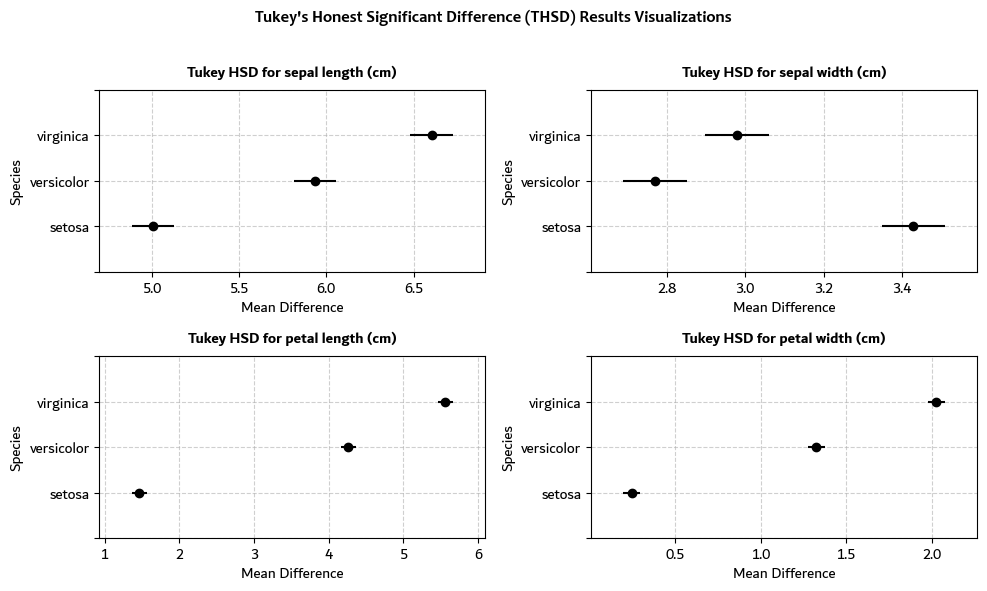

In [102]:
def plot_tukey_hsd(df, variables, factor_column=''):
    
    num_variables = len(variables)
    rows = math.ceil(num_variables / 2)
    cols = min(num_variables, 2)

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11})
    fig.suptitle("Tukey's Honest Significant Difference (THSD) Results Visualizations", fontsize=12, fontweight='bold')
    axes = axes.flatten() if num_variables > 1 else [axes]

    for idx, column in enumerate(variables):
        tukey_result = pairwise_tukeyhsd(df[column], df[factor_column], alpha=0.05)
        tukey_result.plot_simultaneous(ax=axes[idx])
    
        axes[idx].set_title(f"Tukey HSD for {column}", fontsize=11, pad=10, fontweight='bold')
        axes[idx].set_xlabel("Mean Difference", fontsize=11)
        axes[idx].set_ylabel(factor_column, fontsize=11)
        axes[idx].grid(linestyle="--", alpha=0.6)

    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
plot_tukey_hsd(df, variables, factor_column='Species')

<h3 style='font-size: 20px; color: Blue; font-family: Colonna MT; font-weight: 600'>9.7: Compact Letter Display (CLD)</h3>

Below is a function and accompanying scripts that will **automatically compute ANOVA and Tukey’s HSD** for all selected **metrics of interest** in the dataset. The function iterates through each metric, performs **ANOVA** to check for significant differences, then applies **Tukey’s HSD test** to determine which groups differ. Finally, it compiles all results into a **structured format**, ensuring a clear and organized presentation of statistical outcomes for easy interpretation.

In [95]:
def Compact_letters_display(df, Factor='', exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    def calculate_stats_for_column(col_name):
        # Perform OLS and ANOVA
        
        model = smf_ols(f'{col_name}~C({Factor})', data=df).fit()
        anova_results = anova_lm(model)
        
        # Extract p-value from ANOVA
        p_value = anova_results.loc[f'C({Factor})', 'PR(>F)']
        
        # Perform Tukey's test
        tukey = pairwise_tukeyhsd(df[col_name], df[Factor])
        Turkey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        group_labels = letters(Turkey_results)
        
        # Calculate statistics
        stats = df.groupby(Factor)[col_name].agg(['mean', 'sem']).round(2)
        stats['letter'] = stats.index.map(group_labels)
        stats['formatted'] = stats.apply(
            lambda x: f"{x['mean']:.2f} ± {x['sem']:.2f} {x['letter']}", axis=1)
        
        return stats['formatted'], p_value
    
    # Process each numerical column
    results = {}
    p_values = {}
    for col in numeric_cols:
        results[col], p_values[col] = calculate_stats_for_column(col)
    
    # Create the main results DataFrame
    results_df = pd.DataFrame(results)
    results_df.index.name = Factor
    
    # Add p-values row
    p_values_formatted = {col: f"{p:.4f}" + ('***' if p <= 0.001 else '**' if p <= 0.01 else '*' if p <= 0.05 else 'ns') 
                         for col, p in p_values.items()}
    p_value_df = pd.DataFrame([p_values_formatted], index=['p-value'])
    
    # Combine results with p-values
    final_results = pd.concat([results_df, p_value_df])
    
    return final_results

def letters(df, alpha=0.05):
    df["p-adj"] = df["p-adj"].astype(float)
    group1 = set(df.group1.tolist())
    group2 = set(df.group2.tolist())
    groupSet = group1 | group2
    groups = list(groupSet)
    letters = list(string.ascii_lowercase)[:len(groups)]
    cldgroups = letters
    cld = pd.DataFrame(list(zip(groups, letters, cldgroups)))
    cld[3] = ""
    
    for row in df.itertuples():
        if df["p-adj"][row[0]] > alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 2] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 2] += cld.loc[groups.index(df["group1"][row[0]]), 1]
        if df["p-adj"][row[0]] < alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 3] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 3] += cld.loc[groups.index(df["group1"][row[0]]), 1]
    
    cld[2] = cld[2].apply(lambda x: "".join(sorted(x)))
    cld[3] = cld[3].apply(lambda x: "".join(sorted(x)))
    cld.rename(columns={0: "groups"}, inplace=True)
    cld = cld.sort_values(cld.columns[2], key=lambda x: x.str.len())
    cld["labels"] = ""
    letters = list(string.ascii_lowercase)
    unique = []
    
    for item in cld[2]:
        for fitem in cld["labels"].unique():
            for c in range(len(fitem)):
                if not set(unique).issuperset(set(fitem[c])):
                    unique.append(fitem[c])
        g = len(unique)
        for kitem in cld[1]:
            if kitem in item:
                if cld.loc[cld[1] == kitem, "labels"].iloc[0] == "":
                    cld.loc[cld[1] == kitem, "labels"] += letters[g]
                if kitem in " ".join(cld.loc[cld["labels"] == letters[g], 3]):
                    g = len(unique) + 1
                if len(set(cld.loc[cld[1] == kitem, "labels"].iloc[0]).intersection(cld.loc[cld[2] == item, "labels"].iloc[0])) <= 0:
                    if letters[g] not in list(cld.loc[cld[1] == kitem, "labels"].iloc[0]):
                        cld.loc[cld[1] == kitem, "labels"] += letters[g]
                    if letters[g] not in list(cld.loc[cld[2] == item, "labels"].iloc[0]):
                        cld.loc[cld[2] == item, "labels"] += letters[g]
    
    cld = cld.sort_values("labels")
    cld.drop(columns=[1, 2, 3], inplace=True)
    cld = dict(zip(cld["groups"], cld["labels"]))
    return cld

def compactLettersTable(df, Independet_variables, Variables):
    dataframe = df.copy()
    dataframe.columns = dataframe.columns.to_series().apply(rename)
    Independet_variables = rename(Independet_variables)
    Results = Compact_letters_display(dataframe, Independet_variables)
    Results.columns = Variables
    return Results

Results = compactLettersTable(df, Independet_variables="Species", Variables=Metrics)
Results.transpose()

,setosa,versicolor,virginica,p-value
sepal length (cm),5.01 ± 0.05 c,5.94 ± 0.07 a,6.60 ± 0.09 b,0.0000***
sepal width (cm),3.43 ± 0.05 c,2.77 ± 0.04 a,2.98 ± 0.05 b,0.0000***
petal length (cm),1.46 ± 0.02 c,4.26 ± 0.07 a,5.56 ± 0.08 b,0.0000***
petal width (cm),0.25 ± 0.01 c,1.33 ± 0.03 a,2.03 ± 0.04 b,0.0000***


<h3 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>9.8: Compact Letter Display (CLD) Visualization</h3>

Now, let's **visualize the Compact Letter Display (CLD)** using a graph to make the results more intuitive and facilitate easy comparisons. While the tabular format provides a structured summary, graphical representation enhances clarity by visually displaying group differences. This visualization will plot the means of each treatment along with their assigned letters, making it easier to see which groups are statistically similar or different. By doing this, we ensure a **clear, interpretable, and data-driven** understanding of the results.

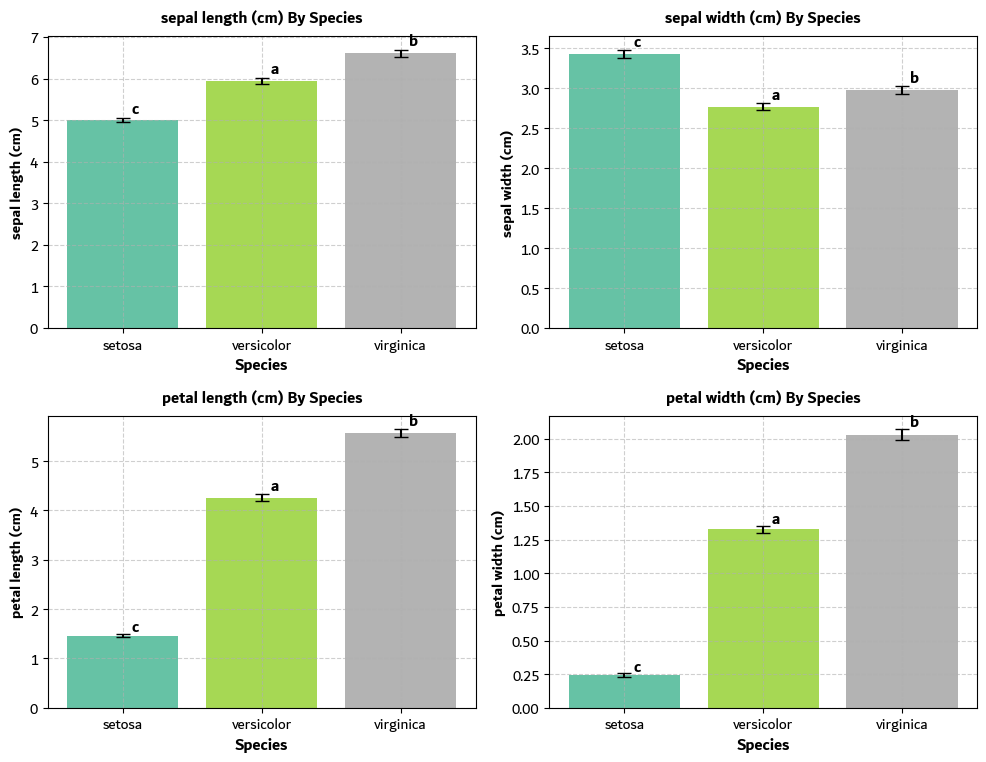

In [105]:
def compact_letter_visualizations(df, Metrics, group='', filepath=None):
    df[Metrics].columns = df[Metrics].columns.to_series().apply(rename)

    num_variables = len(Metrics)
    cols = min(num_variables, 2)
    rows = math.ceil(num_variables / cols)
    
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11})
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, col in enumerate(Metrics):
      
        Turkey = pairwise_tukeyhsd(df[col], groups=df[group])
        Turkeyresults = pd.DataFrame(data=Turkey._results_table.data[1:], columns=Turkey._results_table.data[0])
        group_labels = letters(Turkeyresults)
    
        Aggregate_df = df.groupby(group)[col].agg(["mean", "sem"]).reset_index()
    
        ax = axes[idx]
    
        error = np.full(len(Aggregate_df), Aggregate_df["sem"])
        colors = plt.cm.Set2(np.linspace(0, 1, len(Aggregate_df)))
        bars = ax.bar(Aggregate_df[group], Aggregate_df["mean"], yerr=error, color=colors, capsize=5)
    
        for bar, Letters in zip(bars, Aggregate_df[group]):
            height = bar.get_height()
            offset = height * 0.02  # Dynamic adjustment
            ax.annotate(group_labels[Letters],
                        xy=(bar.get_x() + bar.get_width() / 2, height + offset),
                        xytext=(9, 0),
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=12, fontweight="bold")
    
        ax.set_xticks(range(len(Aggregate_df[group])))
        ax.set_xticklabels(Aggregate_df[group], rotation=0, ha="center")
        ax.set_xlabel(group, fontsize=12, fontweight="bold")
        ax.set_ylabel(col, fontsize=11, fontweight="bold")
        ax.set_title(f"{col} By {group}", fontsize=12, fontweight="bold", pad=10)
        ax.grid(linestyle="--", alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
group_col = "Species"
variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
compact_letter_visualizations(df, variables, group_col)

<h1 style='font-size: 25px;  font-family: Colonna MT; font-weight: 600'>10.0: Quantifying Relationships and Magnitudes of an The effects</h1>

- Effect size calculation is crucial for understanding the practical significance of the results in a study. While statistical tests like t-tests and ANOVA tell us whether the results are statistically significant, effect size tells us how big or how meaningful that effect actually is. Let's break down the most common effect size measures and how we calculate them.

<H3 style='font-size: 18px; color: blue; font-family: colonna MT; font-weight: 600'>10.1: Partial Eta-squared (ηp²))</H3>

**Partial Eta-squared (ηp²)** is a measure of effect size that quantifies the proportion of the total variance in the dependent variable that is attributed to a particular independent variable (or factor), while controlling for the influence of other variables. This is useful in an analysis of variance (ANOVA) context, especially when multiple factors are involved.

In [106]:
def compute_partial_eta_squared(df, numerical_columns, Factors):
    results = []
    Factors = [rename(col) for col in Factors]
    df = df.rename(columns={col: rename(col) for col in df.columns})
    
    for column in numerical_columns:
        for factor in Factors:
            col = rename(column)
            df = df.rename(columns={column: col})
            
            formula = f'{col} ~ C({factor})'
            model = ols(formula, data=df).fit()
            anova_results = anova_lm(model, typ=2)
            SS_factor = anova_results['sum_sq'][f'C({factor})']
            SS_error = anova_results['sum_sq']['Residual']
            partial_eta_squared = SS_factor / (SS_factor + SS_error)
            
            results.append({
                "Variables": column,
                "Factor": factor,
                "Partial Eta-squared (ηp²)": partial_eta_squared
            })
    

    eta_squared_df = pd.DataFrame(results)
    
    def interpret_eta_squared(eta_squared):
        if eta_squared >= 0.14: return "Large effect size (≥ 14%)"
        elif eta_squared >= 0.06: return "Medium effect size (6% - 14%)"
        else: return "Small effect size (< 6%)"
    eta_squared_df['Interpretation'] = eta_squared_df['Partial Eta-squared (ηp²)'].apply(interpret_eta_squared)
    return eta_squared_df

group_cols = ['Species']
variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
eta_squared_df = compute_partial_eta_squared(df, variables, group_cols)
eta_squared_df

,Variables,Factor,Partial Eta-squared (ηp²),Interpretation
0,sepal length (cm),Species,0.625,Large effect size (≥ 14%)
1,sepal width (cm),Species,0.401,Large effect size (≥ 14%)
2,petal length (cm),Species,0.942,Large effect size (≥ 14%)
3,petal width (cm),Species,0.929,Large effect size (≥ 14%)


<H3 style='font-size: 18px; color: Blue; font-family: Colonna MT; font-weight: 600'>10.2. Eta-squared (η²)</H3>

**Eta-squared (η²)** is a measure of effect size used in the context of **ANOVA** to quantify the proportion of the total variance in the dependent variable that is attributable to a specific independent variable (or factor). In other words, it tells you how much of the variance in the dependent variable can be explained by the independent variable or factor in the model. Its Often used in ANOVA, eta-squared measures the proportion of variance in the dependent variable that is explained by the independent variable(s). It is interpreted as the percentage of variability explained by the factors in the model, with values ranging from 0 to 1.

In [107]:
def calculate_eta_squared(aov_table):
    ss_between = aov_table["sum_sq"].iloc[0]
    ss_total = aov_table["sum_sq"].sum()
    return ss_between / ss_total

def perform_anova_and_calculate_eta(df, metrics, group):
    group = [rename(col) for col in group]
    df = df.rename(columns={col: rename(col) for col in df.columns})  # Rename all columns
    
    results = []
    for metric in metrics:
        safe_column_name = rename(metric)
        data = df.rename(columns={metric: safe_column_name})
        
        formula = f'{safe_column_name} ~ ' + ' + '.join([f'C({g})' for g in group])
        model = ols(formula, data=data).fit()
        aov_table = sm.stats.anova_lm(model, typ=2)
        
        eta_sq = calculate_eta_squared(aov_table)
        aov_table["Eta-squared (η²)"] = np.nan
        aov_table.loc[aov_table.index[0], "Eta-squared (η²)"] = eta_sq  # Add Eta squared to the first row
        
        anova_df = aov_table.reset_index().rename(columns={"index": "Source"})
        anova_df.insert(0, "Metric", metric)
        results.append(anova_df)
    
    return pd.concat(results, ignore_index=True)

group_cols = ['Species']
variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
Eta_squared_df = perform_anova_and_calculate_eta(df, variables, group_cols)
Eta_squared_df

,Metric,Source,sum_sq,df,F,PR(>F),Eta-squared (η²)
0,sepal length (cm),C(Species),63.844,2.000,121.615,0.000,0.625
1,sepal length (cm),Residual,38.323,146.000,NaN,NaN,NaN
2,sepal width (cm),C(Species),11.293,2.000,48.823,0.000,0.401
3,sepal width (cm),Residual,16.885,146.000,NaN,NaN,NaN
4,petal length (cm),C(Species),435.498,2.000,1176.842,0.000,0.942
5,petal length (cm),Residual,27.014,146.000,NaN,NaN,NaN
6,petal width (cm),C(Species),79.935,2.000,950.309,0.000,0.929
7,petal width (cm),Residual,6.140,146.000,NaN,NaN,NaN


<H3 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>10.3. Cohen's d</H3>

This is used to measure the difference between two group means in terms of standard deviations. It is often used in t-tests or comparing two independent samples. A small Cohen's d (around 0.2), medium (around 0.5), and large (around 0.8) indicate small, medium, and large effects, respectively.

In [109]:
def cohens_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    pooled_std = np.sqrt(((std1 ** 2) + (std2 ** 2)) / 2)
    return (mean1 - mean2) / pooled_std

def interpret_cohens_d(d_value):
    if abs(d_value) < 0.2:
        interpretation = "Small effect size"
    elif 0.2 <= abs(d_value) < 0.5:
        interpretation = "Medium effect size"
    elif 0.5 <= abs(d_value) < 0.8:
        interpretation = "Large effect size"
    else:
        interpretation = "Very large effect size"
    return interpretation

def calculate_effect_sizes(df, group_column, numerical_columns):
    effect_size_results = []

    for column in numerical_columns:
        group_values = df[group_column].unique()
        for i in range(len(group_values)):
            for j in range(i + 1, len(group_values)):
                group1 = df[df[group_column] == group_values[i]][column]
                group2 = df[df[group_column] == group_values[j]][column]
                
                d_value = cohens_d(group1, group2)
                interpretation = interpret_cohens_d(d_value)
                
                effect_size_results.append({
                    'Column': column,
                    'Pair': f'{group_values[i]} vs {group_values[j]}',
                    'Cohen\'s d': d_value,
                    'Interpretation': interpretation
                
                })

    effect_size_df = pd.DataFrame(effect_size_results)
    return effect_size_df

group_col = 'Species'
variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']

results = calculate_effect_sizes(df, group_col, variables)
results

,Column,Pair,Cohen's d,Interpretation
0,sepal length (cm),setosa vs versicolor,-2.104,Very large effect size
1,sepal length (cm),setosa vs virginica,-3.123,Very large effect size
2,sepal length (cm),versicolor vs virginica,-1.158,Very large effect size
3,sepal width (cm),setosa vs versicolor,1.891,Very large effect size
4,sepal width (cm),setosa vs virginica,1.273,Very large effect size
5,sepal width (cm),versicolor vs virginica,-0.658,Large effect size
6,petal length (cm),setosa vs versicolor,-7.899,Very large effect size
7,petal length (cm),setosa vs virginica,-9.990,Very large effect size
8,petal length (cm),versicolor vs virginica,-2.534,Very large effect size
9,petal width (cm),setosa vs versicolor,-6.816,Very large effect size


<h3 style='font-size: 20px; color: Blue; font-family: Colonna MT; font-weight: 600'>10.4: Regression Analysis</h3>

In [110]:
def regression_analysis(data, dependent_columns, factor1):
    results = []
    for dependent_var in dependent_columns:
        
        column_name = rename(dependent_var)
        data = data.rename(columns={dependent_var: column_name})
        
        formula = f"{column_name} ~ {factor1}"
        model = ols(formula, data=data).fit()
        
        for index, row in model.summary2().tables[1].iterrows():
            results.append({
                "Dependent Variable": dependent_var,
                "Factor": index,
                "Coef.": row["Coef."],
                "Std.Err.": row["Std.Err."],
                "t": row["t"],
                "p-value": row["P>|t|"],
                "95% CI Lower": row["[0.025"],
                "95% CI Upper": row["0.975]"]
            })
    
    return pd.DataFrame(results)

group_col = 'Species'
variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']

regression_results_df = regression_analysis(df, variables, group_col)
regression_results_df

,Dependent Variable,Factor,Coef.,Std.Err.,t,p-value,95% CI Lower,95% CI Upper
0,sepal length (cm),Intercept,5.006,0.072,69.092,0.000,4.863,5.149
1,sepal length (cm),Species[T.versicolor],0.930,0.102,9.076,0.000,0.727,1.133
2,sepal length (cm),Species[T.virginica],1.598,0.103,15.517,0.000,1.395,1.802
3,sepal width (cm),Intercept,3.428,0.048,71.277,0.000,3.333,3.523
4,sepal width (cm),Species[T.versicolor],-0.658,0.068,-9.674,0.000,-0.792,-0.524
5,sepal width (cm),Species[T.virginica],-0.448,0.068,-6.559,0.000,-0.584,-0.313
6,petal length (cm),Intercept,1.462,0.061,24.033,0.000,1.342,1.582
7,petal length (cm),Species[T.versicolor],2.798,0.086,32.524,0.000,2.628,2.968
8,petal length (cm),Species[T.virginica],4.099,0.086,47.408,0.000,3.928,4.270
9,petal width (cm),Intercept,0.246,0.029,8.482,0.000,0.189,0.303


---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions.

---

<h5 style='font-size: 65px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>THE END</h5>